### Imports

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

### Load  Data

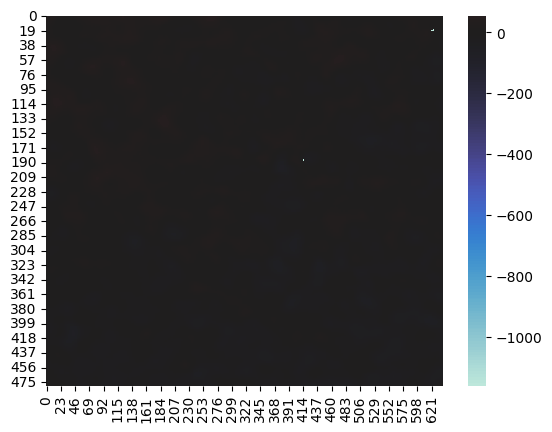

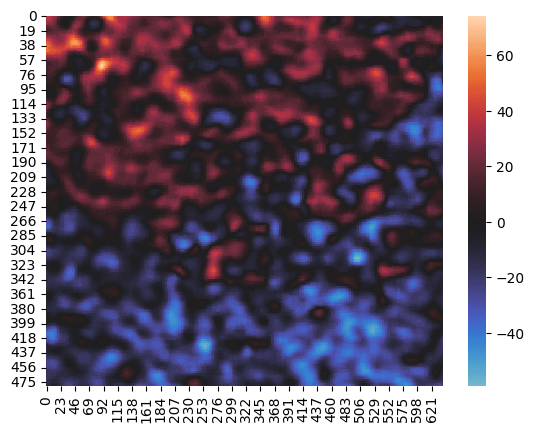

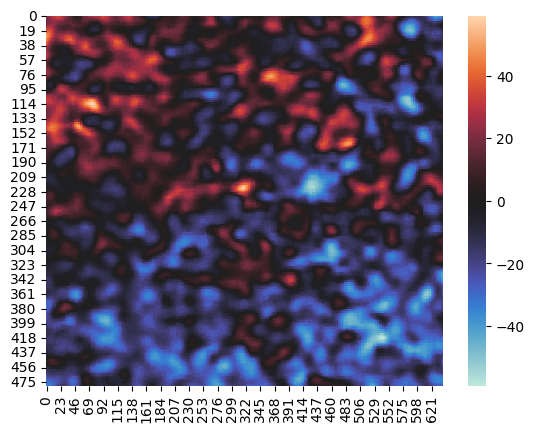

KeyboardInterrupt: 

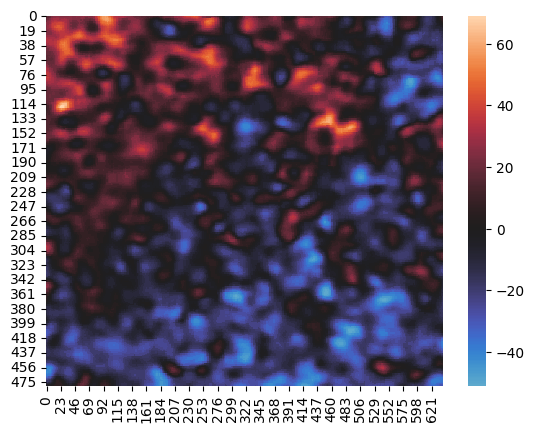

In [4]:
for frame in range(100, 1200, 100):
    
    expected_cm = 116
    expected_mm = expected_cm * 10
    file_path = str('data/' + str(expected_cm) + '/depth_' + str(frame) + '.npy')

    # Load the .npy file
    data = np.load(file_path)
    data = data.astype('int')
    # Access and work with the loaded data
    error = data - expected_mm
    sns.heatmap(error, center=0)
    plt.savefig(str('heatmap_raw_116_') + str(frame) + '.pdf')
    plt.show()
    

In [2]:
# Specify the path to the .npy file
expected_cm = 66
expected_mm = expected_cm * 10
frame = 400
file_path = str('data/' + str(expected_cm) + '/depth_' + str(frame) + '.npy')

# Load the .npy file
data = np.load(file_path)
data = data.astype('int')
# Access and work with the loaded data
print(data)

[[665 666 666 ... 682 682 682]
 [665 665 665 ... 682 682 682]
 [665 665 665 ... 683 683 682]
 ...
 [653 653 653 ... 660 659 659]
 [653 653 653 ... 660 659 659]
 [653 653 653 ... 660 659 659]]


In [3]:
error = data-expected_mm
error

array([[ 5,  6,  6, ..., 22, 22, 22],
       [ 5,  5,  5, ..., 22, 22, 22],
       [ 5,  5,  5, ..., 23, 23, 22],
       ...,
       [-7, -7, -7, ...,  0, -1, -1],
       [-7, -7, -7, ...,  0, -1, -1],
       [-7, -7, -7, ...,  0, -1, -1]])

### Some Statistics, Metrics

In [57]:
def descriptive_stat():
    stat_df = pd.DataFrame(columns=['mean', 'median', 'std', 'min', 'max'], index=[66, 116, 166, 216, 316])
    crop_stat = pd.DataFrame(columns=['mean', 'median', 'std', 'min', 'max'], index=[66, 116, 166, 216, 316])
    for expectation in [66, 116, 166, 216, 316]:
        filename = str('data/' + str(expectation) + '/depth_100.npy')
        expected_mm = expectation * 10
        data = np.load(filename)
        data = data.astype('int')
        cropped = data[200:400, 100:300]

        smooth_error = data - expected_mm
        smooth_error_crop = cropped - expected_mm
        for frame in range(200, 1200, 100):
            # Specify the path to the .npy file
            file_path = str('data/' + str(expectation) + '/depth_' + str(frame) + '.npy')

            # Load the .npy file
            data = np.load(file_path)
            data = data.astype('int')
            cropped = data[200:400, 200:400]

            error = data - expected_mm
            error_c = cropped - expected_mm
            smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                                error, smooth_error))
            smooth_error_crop = pd.DataFrame(np.where(abs(error_c) < abs(smooth_error_crop),
                                                error_c, smooth_error_crop))
            # Compute the mean
            mean_value = np.median(smooth_error)
            stat_df.at[expectation, 'mean'] = mean_value
            
            # Compute the median
            median_value = np.median(smooth_error)
            stat_df.at[expectation, 'median'] = median_value

            # Compute the standard deviation
            std_value = np.std(np.std(smooth_error))
            stat_df.at[expectation, 'std'] = std_value

            # Find the minimum and maximum values
            min_value = np.min(smooth_error)
            stat_df.at[expectation, 'min'] = min_value
            max_value = np.max(smooth_error)
            stat_df.at[expectation, 'max'] = max_value

            
            #### SAME FOR CROPPED
            # Compute the mean
            mean_value = np.median(smooth_error_crop)
            crop_stat.at[expectation, 'mean'] = mean_value
            
            # Compute the median
            median_value = np.median(smooth_error_crop)
            crop_stat.at[expectation, 'median'] = median_value

            # Compute the standard deviation
            std_value = np.std(np.std(smooth_error_crop))
            crop_stat.at[expectation, 'std'] = std_value

            # Find the minimum and maximum values
            min_value = np.min(smooth_error_crop)
            crop_stat.at[expectation, 'min'] = min_value
            max_value = np.max(smooth_error_crop)
            crop_stat.at[expectation, 'max'] = max_value
            
            
    return stat_df, crop_stat

### Evaluation

In [58]:
full, cropped = descriptive_stat()
cropped


,mean,median,std,min,max
66,0.0,0.0,0.109183,-3,4
116,-1.0,-1.0,0.410856,-14,12
166,-2.0,-2.0,0.847626,-28,26
216,-5.0,-5.0,2.442636,-71,57
316,-6.0,-6.0,5.919625,-189,148


In [59]:
full

,mean,median,std,min,max
66,0.0,0.0,1.29124,-7,17
116,-1.0,-1.0,0.51953,-20,19
166,-2.0,-2.0,1.226227,-45,35
216,-5.0,-5.0,9.876878,-545,90
316,-22.0,-22.0,188.486458,-3160,527


In [60]:
full.to_csv('full_stat_min_e.csv')
cropped.to_csv('200-400_square_stat_min_e.csv')

In [80]:
def save_smooth_heatmap(expectation: int):
  filename = str('data/' + str(expectation) + '/depth_100.npy')
  expected_mm = expectation * 10
  data = np.load(filename)
  data = data.astype('int')
  cropped = data[200:400, 100:300]

  smooth_error = data - expected_mm
  smooth_error_crop = cropped - expected_mm
  for frame in range(200, 1200, 100):
    # Specify the path to the .npy file
    file_path = str('data/' + str(expectation) + '/depth_' + str(frame) + '.npy')

    # Load the .npy file
    data = np.load(file_path)
    data = data.astype('int')
    cropped = data[200:400, 200:400]

    error = data - expected_mm
    error_c = cropped - expected_mm
    smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                         error, smooth_error))
    smooth_error_crop = pd.DataFrame(np.where(abs(error_c) < abs(smooth_error_crop),
                                         error_c, smooth_error_crop))
  # sns.heatmap(smooth_error_crop)
  heatmap_ = sns.heatmap(smooth_error_crop, center=0)
  colorbar = heatmap_.collections[0].colorbar
  colorbar.set_ticks(np.flip(colorbar.get_ticks()))
  
  plt.title('Minimal error (' + str(expectation) + 'cm)')
  # plt.savefig("heatmaps/" + str(expectation) + "/min_error.pdf")
  # Display the heatmap
  plt.show()

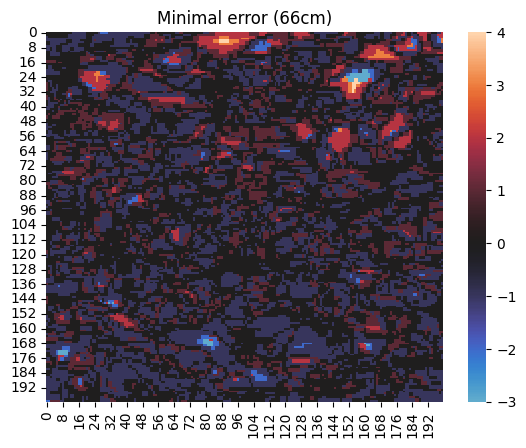

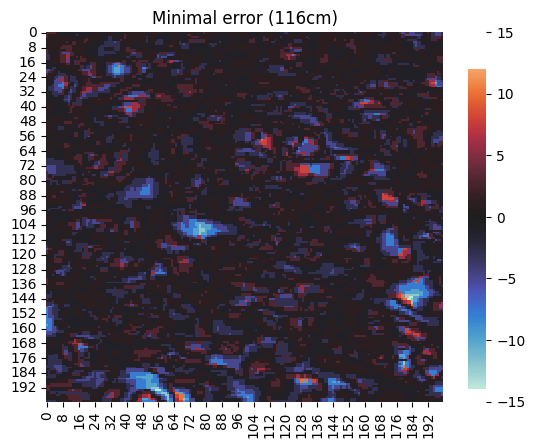

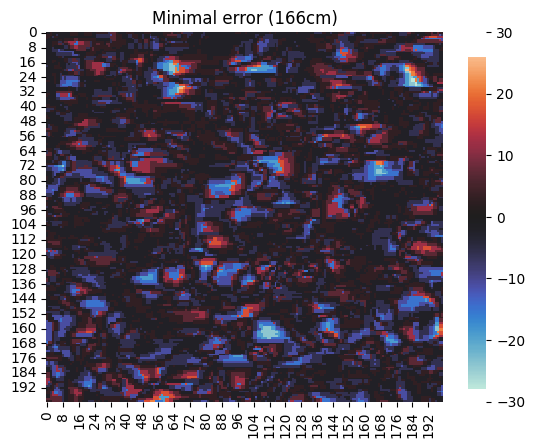

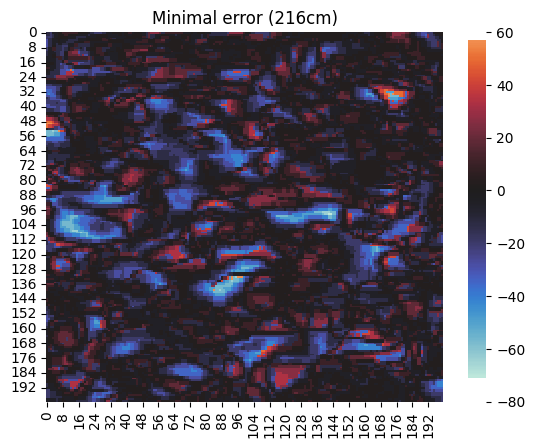

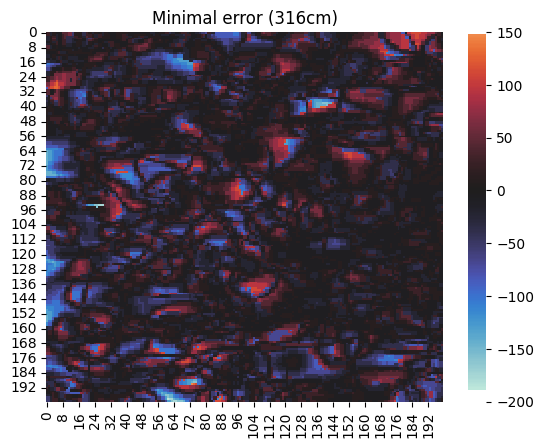

In [81]:
for i in [66, 116, 166, 216, 316]:
  save_smooth_heatmap(i)

In [3]:
expectation = 66
filename = str('data/' + str(expectation) + '/depth_100.npy')
expected_mm = expectation * 10
data = np.load(filename)
data = data.astype('int')
cropped = data[200:400, 100:300]

smooth_error = data - expected_mm
smooth_error_crop = cropped - expected_mm

In [ ]:
# timeline
# scatterplot
# keypont accuracy

### Plot methods

In [8]:
def boxplot_cropped():
    # Get all 
    errors = list([])
    for expectation in [66, 116, 166, 216, 316]:
        filename = str('data/' + str(expectation) + '/depth_100.npy') 
        expected_mm = expectation * 10
        data = np.load(filename)
        data = data.astype('int')
        cropped = data[200:400, 200:400]

        smooth_error = data - expected_mm
        smooth_error_crop = cropped - expected_mm
        
        for frame in range(200, 1200, 100):
            # Specify the path to the .npy file
            file_path = str('data/' + str(expectation) + '/depth_' + str(frame) + '.npy')

            # Load the .npy file
            data = np.load(file_path)
            data = data.astype('int')
            cropped = data[200:400, 200:400]

            error = data - expected_mm
            error_c = cropped - expected_mm
            smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                                error, smooth_error))
            smooth_error_crop = pd.DataFrame(np.where(abs(error_c) < abs(smooth_error_crop),
                                                error_c, smooth_error_crop))
            # Combine the error values into a list or a NumPy array
            smooth_error_flat = smooth_error.values.flatten()
            smooth_error_crop_flat = smooth_error_crop.values.flatten()
        errors.append(smooth_error_crop_flat)
        
    # Create a box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(errors)
    plt.xlabel('Expected Depth')
    plt.ylabel('Error')
    plt.title('Error Distribution (Box Plot)')
    plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['660 mm', '1160 mm', '1660 mm', '2160 mm', '3160 mm'])
    plt.savefig('boxplot_croppic_66-316.png')
    plt.show()

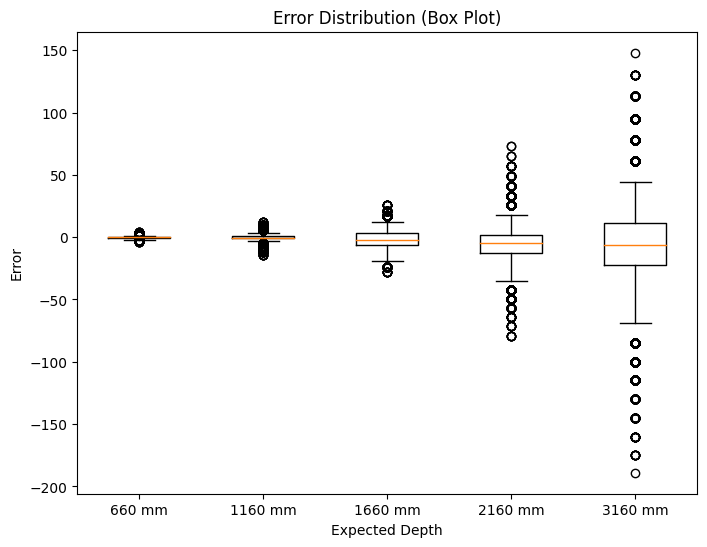

In [9]:
boxplot_cropped()

In [82]:
def show_histogram(error_data, exp):
    bin = abs(error_data.max() - error_data.min())
    print(bin)
    plt.figure(figsize=(8, 6))
    sns.histplot(error_data.flatten(), kde=False, bins=bin, alpha=0.99, color='steelblue')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.title('Error Distribution (Histogram), (' + str(exp * 10) + ' mm)')
    plt.savefig(str('histogram_' + str(exp) + '.pdf'))
    plt.show()

8


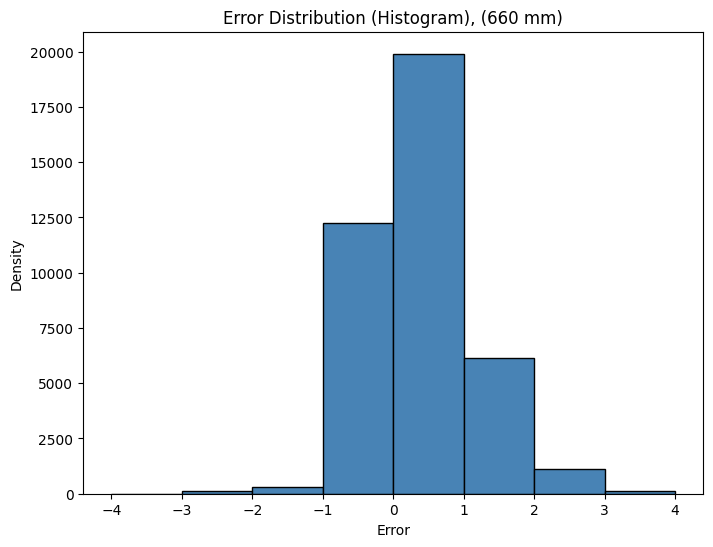

26


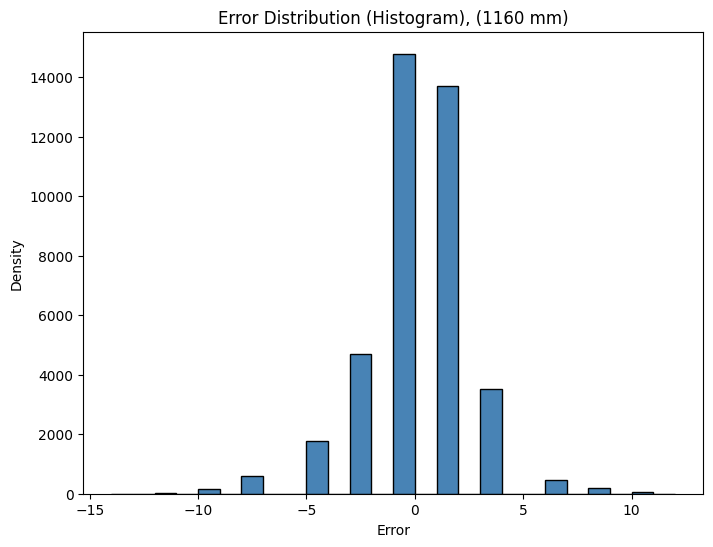

54


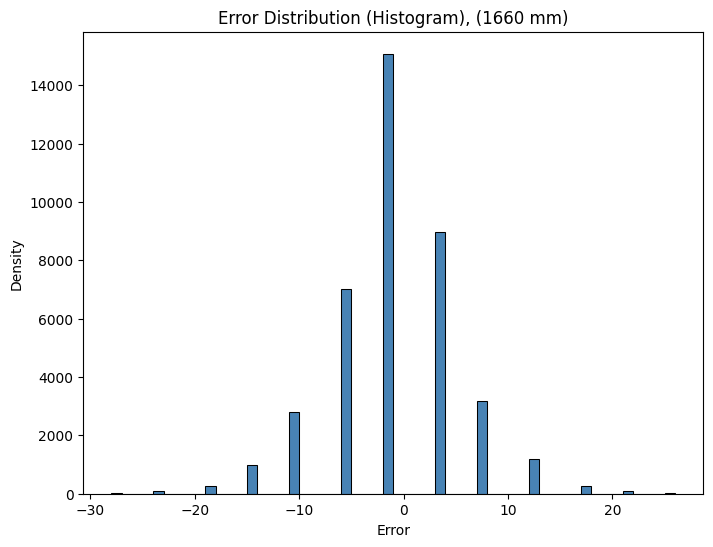

152


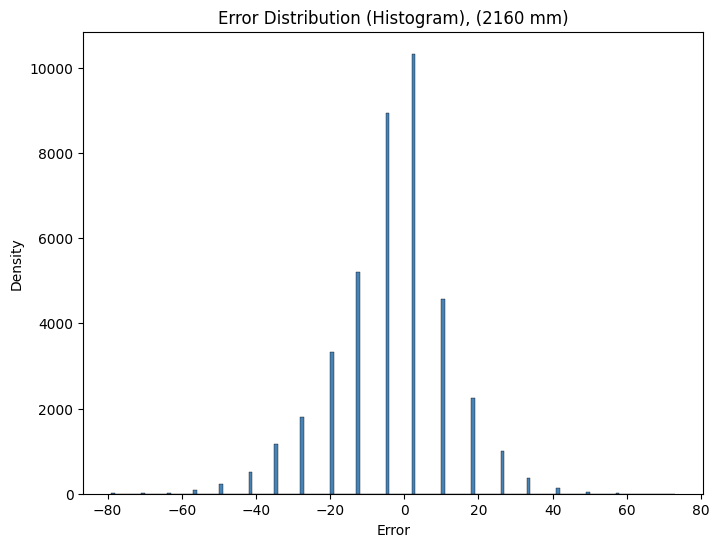

337


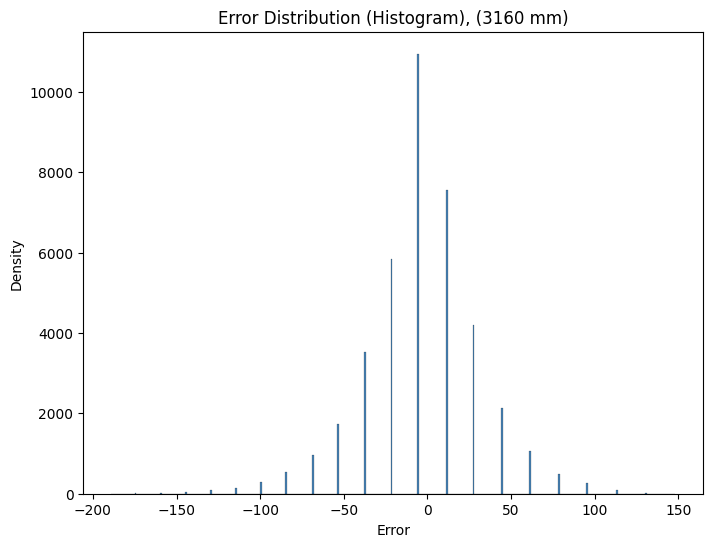

In [83]:
errors = list([])
for expectation in [66, 116, 166, 216, 316]:
    filename = str('data/' + str(expectation) + '/depth_100.npy') 
    expected_mm = expectation * 10
    data = np.load(filename)
    data = data.astype('int')
    cropped = data[200:400, 200:400]

    smooth_error = data - expected_mm
    smooth_error_crop = cropped - expected_mm
    
    for frame in range(200, 1200, 100):
        # Specify the path to the .npy file
        file_path = str('data/' + str(expectation) + '/depth_' + str(frame) + '.npy')

        # Load the .npy file
        data = np.load(file_path)
        data = data.astype('int')
        cropped = data[200:400, 200:400]

        error = data - expected_mm
        error_c = cropped - expected_mm
        smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                            error, smooth_error))
        smooth_error_crop = pd.DataFrame(np.where(abs(error_c) < abs(smooth_error_crop),
                                            error_c, smooth_error_crop))
        # Combine the error values into a list or a NumPy array
        smooth_error_flat = smooth_error.values.flatten()
        smooth_error_crop_flat = smooth_error_crop.values.flatten()
    show_histogram(smooth_error_crop_flat, expectation)

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(smooth_error.flatten(), kde=False, bins=45, alpha=0.99, color='steelblue')
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution (Histogram)')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'flatten'

<Figure size 800x600 with 0 Axes>

### Test GC

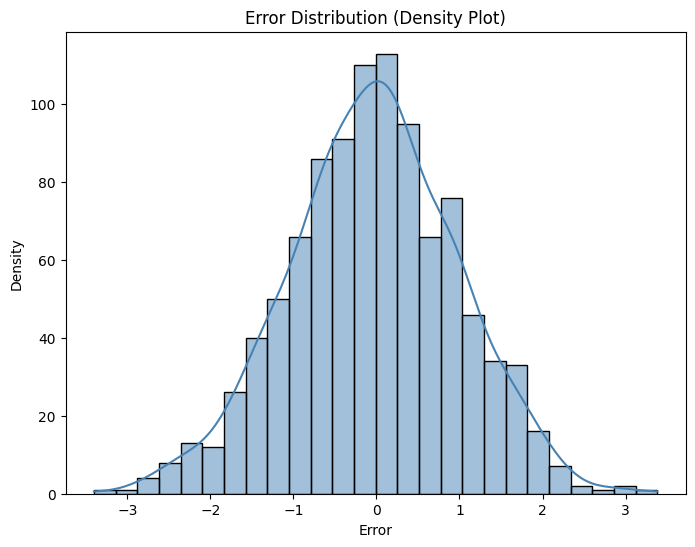

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have an array of errors
errors = np.random.normal(loc=0, scale=1, size=1000)  # Example errors (normally distributed)

# Plot a density plot without line labels
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='steelblue')
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution (Density Plot)')
plt.show()

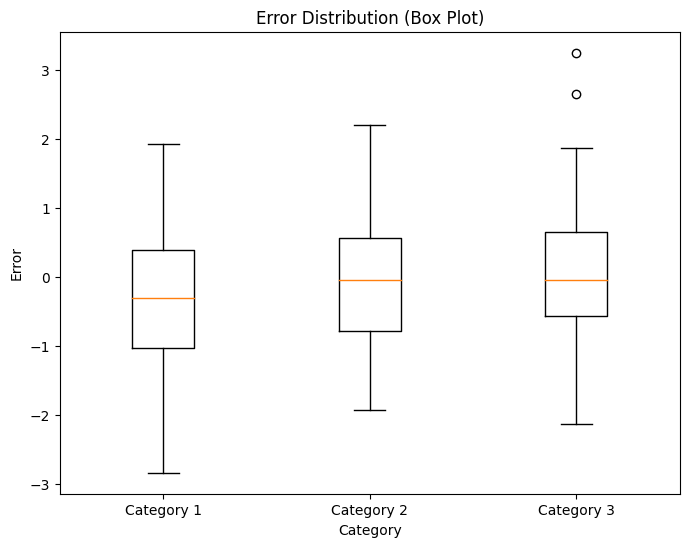

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have a list of error values for different categories
category1_errors = np.random.normal(loc=0, scale=1, size=100)
category2_errors = np.random.normal(loc=0, scale=1, size=100)
category3_errors = np.random.normal(loc=0, scale=1, size=100)

# Combine the error values into a list or a NumPy array
errors = [category1_errors, category2_errors, category3_errors]

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(errors)
plt.xlabel('Category')
plt.ylabel('Error')
plt.title('Error Distribution (Box Plot)')
plt.xticks(ticks=[1, 2, 3], labels=['Category 1', 'Category 2', 'Category 3'])
plt.show()


################ Scatterplot

In [6]:
def get_smooth_data(expectation):
    file_path = str('data/' + str(expectation) + '/depth_100.npy')
    expected_mm = expectation * 10
    # Load the .npy file
    data = np.load(file_path)
    data = data.astype('int')
    cropped = data[200:400, 200:400]

    error = data - expected_mm
    error_c = cropped - expected_mm

    smooth_error = error
    smooth_error_crop = error_c
    for frame in range(200, 1200, 100):
        # Specify the path to the .npy file
        file_path = str('data/' + str(expectation) + '/depth_' + str(frame) + '.npy')

        # Load the .npy file
        data = np.load(file_path)
        data = data.astype('int')
        cropped = data[200:400, 200:400]

        error = data - expected_mm
        error_c = cropped - expected_mm
        smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                            error, smooth_error))
        smooth_error_crop = pd.DataFrame(np.where(abs(error_c) < abs(smooth_error_crop),
                                            error_c, smooth_error_crop))
        # Combine the error values into a list or a NumPy array
        smooth_error_flat = smooth_error.values.flatten()
        smooth_error_crop_flat = smooth_error_crop.values.flatten()
    
    return smooth_error
    

In [17]:
get_smooth_data(66)

array([[664, 664, 664, ..., 681, 681, 681],
       [664, 664, 663, ..., 681, 681, 681],
       [664, 664, 663, ..., 681, 681, 681],
       ...,
       [656, 656, 655, ..., 665, 665, 666],
       [656, 656, 655, ..., 665, 665, 666],
       [656, 656, 655, ..., 664, 664, 664]])

In [21]:
error_set1 = get_smooth_data(66)
error_set2 = get_smooth_data(116)
error_set3 = get_smooth_data(166)
error_set4 = get_smooth_data(216)
error_set5 = get_smooth_data(316)
error_set1.flatten()

array([ 0, -1, -1, ..., -1, -1, -1])

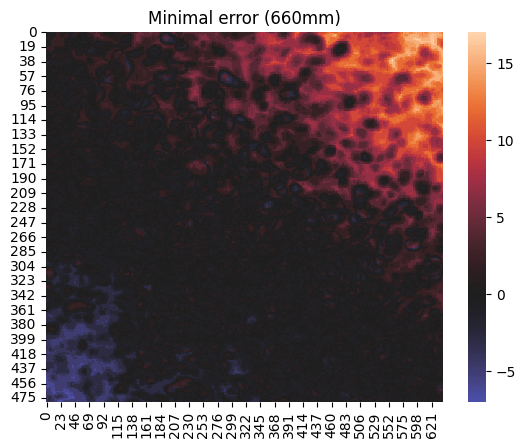

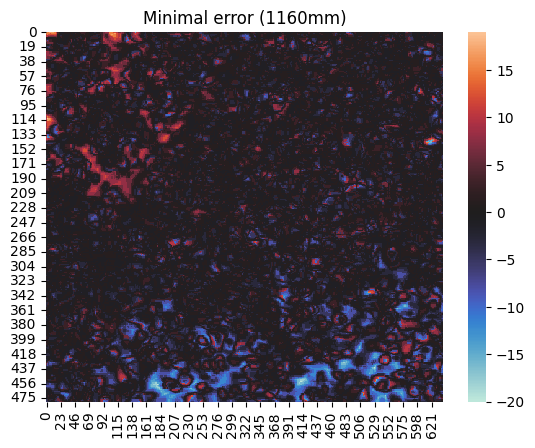

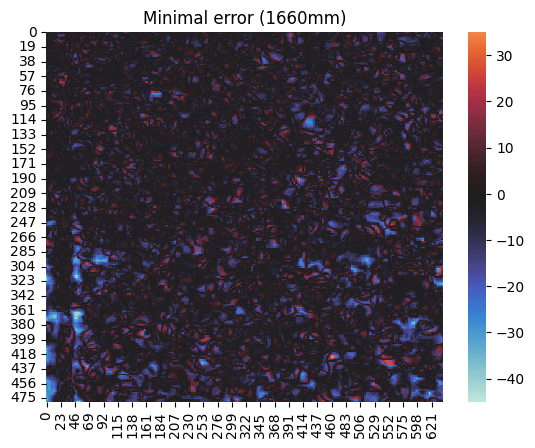

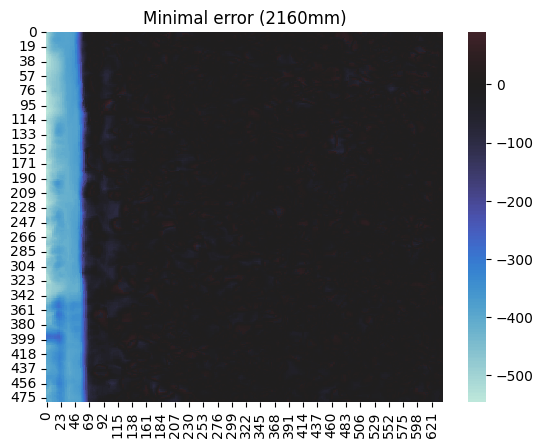

In [7]:
for i in [66, 116, 166, 216, 316]:
    error = get_smooth_data(i)
    heatmap_ = sns.heatmap(error, center=0)

    plt.title('Minimal error (' + str(i*10) + 'mm)')
    plt.savefig("data/heatmaps_" + str(i) + "_min_full_error.pdf")
    # Display the heatmap
    plt.show()

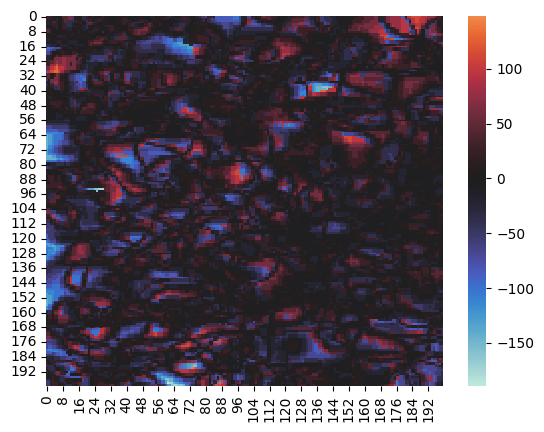

In [23]:
heatmap_ = sns.heatmap(error, center=0)

plt.show()

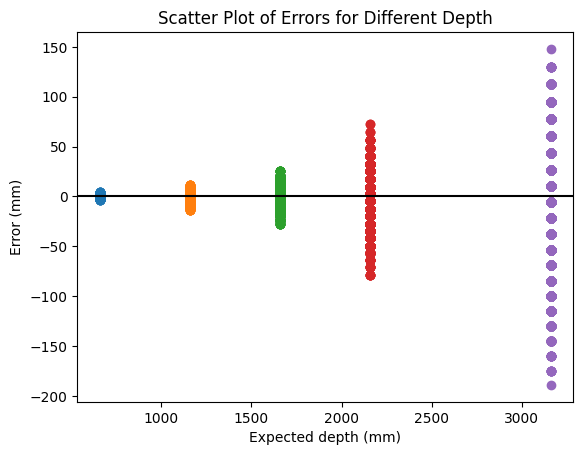

In [29]:
import matplotlib.pyplot as plt

# Assume you have five sets of errors and their corresponding values
error_sets = [error_set1.flatten(), 
              error_set2.flatten(), 
              error_set3.flatten(), 
              error_set4.flatten(), 
              error_set5.flatten()]
x_values = [660, 1160, 1660, 2160, 3160]

for x_val, error_set in zip(x_values, error_sets):
    plt.scatter([x_val] * len(error_set), error_set)
# Add a line at y = 0
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Expected depth (mm)')
plt.ylabel('Error (mm)')
plt.title('Scatter Plot of Errors for Different Depth')
plt.savefig('scatterplot_cropped.pdf')
plt.show()

### Compare environments

In [3]:
def get_smooth_data_fromfile(dirpath):
    file_path = str('data/' + str(dirpath) + 'depth_100.npy')
    print(file_path)
    print(type(file_path))
    expected_mm = 1160
    # Load the .npy file
    data = np.load(file_path)
    print(data)
    data = data.astype('int')
    print(data)
    error = data - expected_mm

    smooth_error = error
    for frame in range(20, 200, 20):
        # Specify the path to the .npy file
        file_path = str('data/' + str(dirpath) + 'depth_' + str(frame) + '.npy')

        # Load the .npy file
        data = np.load(file_path)
        data = data.astype('int')

        error = data - expected_mm
        smooth_error = pd.DataFrame(np.where(abs(error) < abs(smooth_error),
                                            error, smooth_error))
    
    return smooth_error  

In [4]:
light = get_smooth_data_fromfile('wallLight/')
dark = get_smooth_data_fromfile('walldark/')

data/wallLight/depth_100.npy
<class 'str'>
[[1142 1144 1146 ... 1184 1182 1182]
 [1142 1144 1146 ... 1184 1184 1184]
 [1142 1146 1146 ... 1186 1186 1186]
 ...
 [1127 1123 1123 ... 1207 1207 1205]
 [1129 1127 1127 ... 1207 1207 1205]
 [1129 1127 1127 ... 1205 1202 1202]]
[[1142 1144 1146 ... 1184 1182 1182]
 [1142 1144 1146 ... 1184 1184 1184]
 [1142 1146 1146 ... 1186 1186 1186]
 ...
 [1127 1123 1123 ... 1207 1207 1205]
 [1129 1127 1127 ... 1207 1207 1205]
 [1129 1127 1127 ... 1205 1202 1202]]
data/walldark/depth_100.npy
<class 'str'>
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 1186 1186    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 1186 1186    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


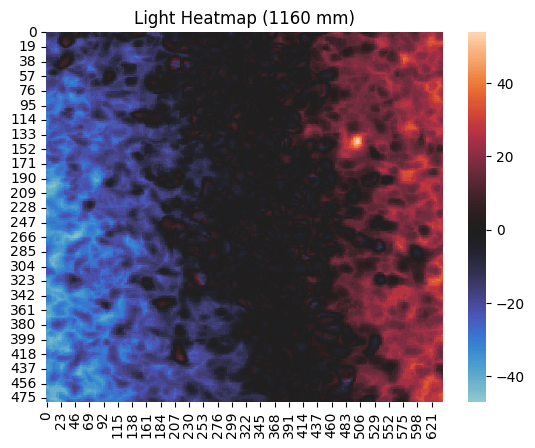

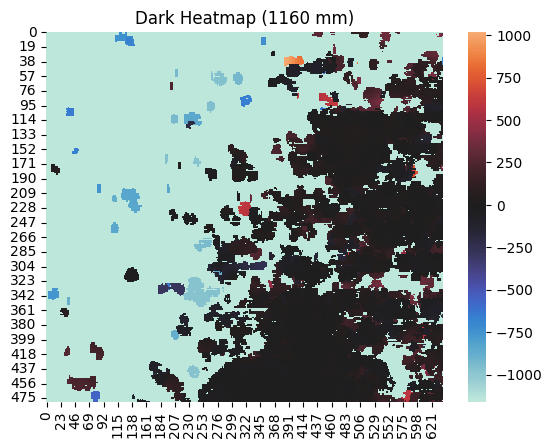

In [7]:
sns.heatmap(light, center=0)
plt.title('Light Heatmap (1160 mm)')
plt.savefig('light_heatmap.png')
plt.show()
sns.heatmap(dark, center=0)
plt.title('Dark Heatmap (1160 mm)')
plt.savefig('dark_heatmap.png')
plt.show()